# Morris Method for New Model
New model has one erosion parameter for the same region of each blade.  This means that the model has 9 inputs.

In [2]:
# For testing with active control of the blade pitch
from SALib.sample.morris.morris import sample
import numpy as np

# Define the model inputs
# recall that our model takes input vectors of the form:

# [wind_direction,wind_speed,blade_angle,air_density,erosion_blade1_region1,..._region6,
# erosion_blade2_region1,...,_region6,erosion_blade3_region1,..._region6]

problem = {
    'num_vars': 9,
    'names': ['wind_dir', 'wind_spd','air_dens',
              'er1','er2','er3','er4','er5','er6'],
    'bounds': [[0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1]]
}

# N = number of trajectories to generate
N = 100;

# num_levels = number of partitions for the input dimensions
num_levels = 10;

# optimal trajectories
opt = 40;

# Generate samples
param_values = sample(problem, N, num_levels, opt)

# Save the outputs
np.savetxt("Morris400.txt", param_values)

## Experiment Intended Ranges:
- Wind Direction `[0, 30]`
- Wind Speed `[3, 25]`
- Air Density `[.9*1.225, 1.1*1.225]`
- Erosion Levels `[0, 1]`
# Run Analysis

In [1]:
from SALib.analyze.morris import analyze
import pandas as pd
import numpy as np

problem = {
    'num_vars': 9,
    'names': ['wind_dir', 'wind_spd','air_dens',
              'er1','er2','er3','er4','er5','er6'],
    'bounds': [[0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1],
               [0,1]]
}

inputs = np.loadtxt("Morris400.txt", float)

# Load in the corresponding Morris results file
morris_exp_data = pd.read_table("InTable_All_NewMorris.txt",delimiter = ',')

BldPitch1_std
                mu   mu_star     sigma  mu_star_conf
wind_dir -0.021530  0.118471  0.506106      0.173574
wind_spd  0.032940  0.036956  0.068248      0.020856
air_dens -0.029178  0.030272  0.108967      0.032151
er1      -0.006382  0.008030  0.027401      0.009909
er2       0.000256  0.001343  0.003742      0.001317
er3       0.000007  0.011226  0.035522      0.010511
er4       0.072114  0.078719  0.386762      0.108856
er5      -0.069426  0.095247  0.369448      0.126078
er6      -0.059811  0.075578  0.288824      0.077944
wind_dir
er4
er5
er6
air_dens
wind_spd


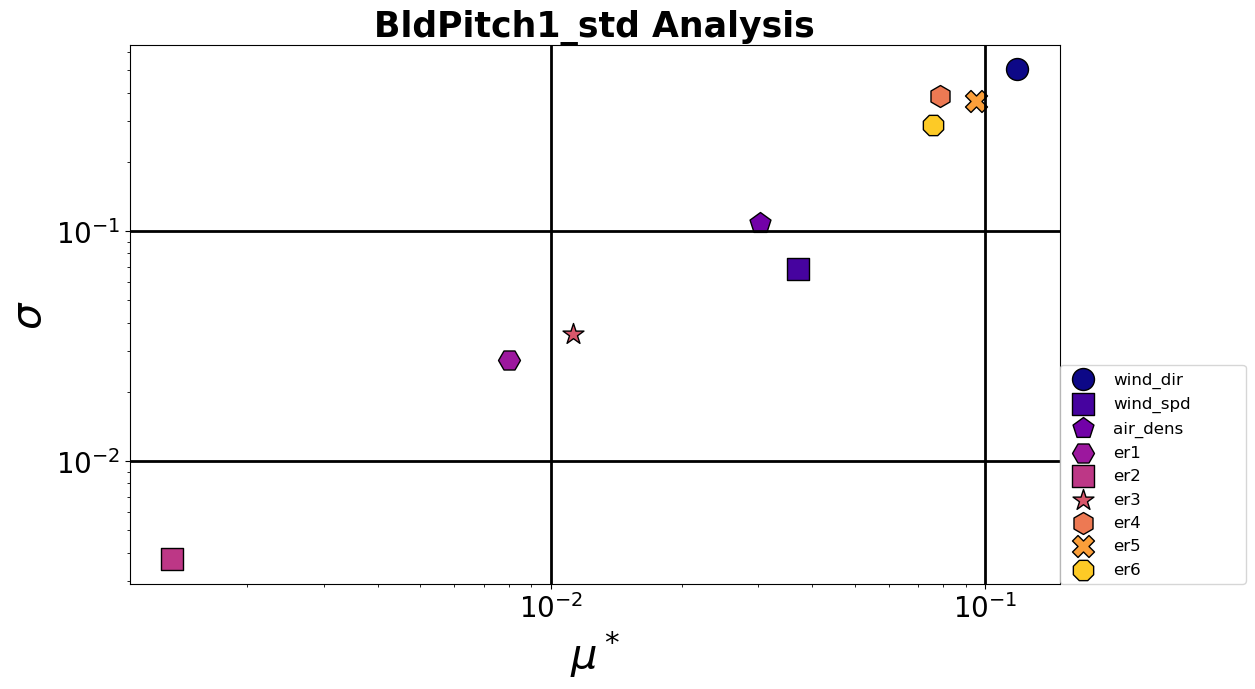

In [6]:
allnames = morris_exp_data.columns.tolist()

n = 156; 
# Output name
outname = allnames[n]
print(outname)
outputs = morris_exp_data[[allnames[n]]].to_numpy()
allnames[n]

# just in case something became a nan-run this
for i in range(len(outputs)):
    if np.isnan(outputs[i]) == 1:
        print('Output',i,'is nan')

outputs = np.nan_to_num(outputs, 0)

Si = analyze(problem, inputs, outputs, conf_level=0.95,
                    print_to_console=True, num_levels=4)

import matplotlib.pyplot as plt

# We want to plot the mu_star on the xaxis and the sigma on the y axis

# But first let's try something out...
stor = np.zeros((2,9))
stor[0,:] = Si["mu_star"]
stor[1,:] = Si["sigma"]

vals = np.zeros((9,))

for i in range(9):
    vals[i] = np.linalg.norm(stor[:,i])
tempvals = vals
# List off the top 5 influential inputs...
for j in range(6):
    ind = np.argmax(tempvals)
    print(Si["names"][ind])
    tempvals[ind] = 0
    
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

stor = np.zeros((2,9))
stor[0,:] = Si["mu_star"]
stor[1,:] = Si["sigma"]

vals = np.zeros((9,))
for i in range(9):
    vals[i] = np.linalg.norm(stor[:,i])

cmap = plt.cm.plasma
norm = plt.Normalize(vmin=0, vmax=9)
nomr1 = plt.Normalize(vmin=min(vals),vmax=max(vals))
plt.yscale("log")
plt.xscale("log")
ms = ["o","s","p","H","s","*","h","X","8","H","s","*","h","X","8","H","s","*","h","X","8"];
for i in range(len(Si["names"])):
    cl = cmap(norm(i))
    scale = 250 #400*nomr1(vals[i])
    ax.scatter(Si["mu_star"][i], Si["sigma"][i], marker = ms[i],color=cl, s=scale, label=Si["names"][i], edgecolors='black')
              
#ax.legend(loc="upper left")
ax.legend(bbox_to_anchor=(1,0,.2,2), loc='lower left',
           ncols=1,mode="expand", borderaxespad=0,fontsize=12)
ax.grid(True)
ax.set_xlabel("$\mu^*$",fontsize=30)
ax.set_ylabel("$\sigma$",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.grid(color='k', linewidth=2)
outname = outname+" Analysis"
ax.set_title(outname,fontsize = 25,fontweight = 'bold')
plt.show()